# Test Gym Data Generation

This notebook tests the `generate_data` function from the auxiliar module.

The function returns two tables:
1. **Users table** (static): USER_ID, REGISTRATION_DATE, AGE, GENDER, ZUMBA, BODY_PUMP, PILATES, SPINNING
2. **Visits table**: USER_ID, ENTRY_TIME, EXIT_TIME


In [1]:
# Setup path to import from project root
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from auxiliar.auxiliar import generate_data


In [2]:
# Generate sample data for 100 users
users_df, visits_df = generate_data(num_users=100, visits_per_user=(5, 20))

print(f"Generated {len(users_df)} users and {len(visits_df)} visit records")
print(f"\n=== USERS TABLE ===")
print(users_df.head(10))


Generated 100 users and 1324 visit records

=== USERS TABLE ===
   USER_ID   REGISTRATION_DATE  AGE GENDER  ZUMBA  BODY_PUMP  PILATES  \
0    93810 2024-09-08 18:56:00   35      M  False      False    False   
1    24592 2022-07-29 17:14:00   39      M  False       True    False   
2    13278 2022-10-14 10:03:00   22      F  False      False     True   
3    46048 2025-06-17 17:13:00   54      M  False       True    False   
4    42098 2022-05-23 20:09:00   40      F  False      False     True   
5    39256 2022-12-16 17:43:00   45      M  False      False    False   
6    28289 2024-07-21 19:19:00   39      M  False       True     True   
7    23434 2022-05-20 17:01:00   47      M  False      False    False   
8    98696 2023-04-08 18:39:00   46      M  False      False    False   
9    81482 2022-06-15 20:06:00   37      M  False      False    False   

   SPINNING  
0     False  
1      True  
2      True  
3      True  
4     False  
5     False  
6     False  
7      True  
8     

In [3]:
# Check visits table
print("=== VISITS TABLE ===")
print(visits_df.head(10))
print(f"\nVisits per user: min={visits_df.groupby('USER_ID').size().min()}, max={visits_df.groupby('USER_ID').size().max()}")


=== VISITS TABLE ===
   USER_ID          ENTRY_TIME           EXIT_TIME
0    95181 2022-02-21 10:41:00 2022-02-21 11:27:00
1    95181 2022-04-17 19:33:00 2022-04-17 20:16:00
2    47930 2022-05-06 12:16:00 2022-05-06 13:18:00
3    95181 2022-05-06 17:18:00 2022-05-06 18:34:00
4    95181 2022-06-22 19:54:00 2022-06-22 21:00:00
5    94939 2022-07-29 11:30:00 2022-07-29 13:09:00
6    23434 2022-08-11 18:15:00 2022-08-11 18:49:00
7    23434 2022-09-04 20:22:00 2022-09-04 21:00:00
8    95181 2022-09-07 20:41:00 2022-09-07 21:00:00
9    54597 2022-09-14 10:14:00 2022-09-14 11:10:00

Visits per user: min=5, max=20


In [4]:
# Check data types for both tables
print("=== USERS TABLE INFO ===")
users_df.info()
print("\n=== VISITS TABLE INFO ===")
visits_df.info()


=== USERS TABLE INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   USER_ID            100 non-null    int64         
 1   REGISTRATION_DATE  100 non-null    datetime64[ns]
 2   AGE                100 non-null    int64         
 3   GENDER             100 non-null    object        
 4   ZUMBA              100 non-null    bool          
 5   BODY_PUMP          100 non-null    bool          
 6   PILATES            100 non-null    bool          
 7   SPINNING           100 non-null    bool          
dtypes: bool(4), datetime64[ns](1), int64(2), object(1)
memory usage: 3.6+ KB

=== VISITS TABLE INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   USER_ID   

In [5]:
# Check class enrollment distribution
print("=== CLASS ENROLLMENT ===")
print(f"ZUMBA:     {users_df['ZUMBA'].sum()} users ({users_df['ZUMBA'].mean()*100:.1f}%)")
print(f"BODY_PUMP: {users_df['BODY_PUMP'].sum()} users ({users_df['BODY_PUMP'].mean()*100:.1f}%)")
print(f"PILATES:   {users_df['PILATES'].sum()} users ({users_df['PILATES'].mean()*100:.1f}%)")
print(f"SPINNING:  {users_df['SPINNING'].sum()} users ({users_df['SPINNING'].mean()*100:.1f}%)")

# Count users by number of classes enrolled
users_df['NUM_CLASSES'] = users_df[['ZUMBA', 'BODY_PUMP', 'PILATES', 'SPINNING']].sum(axis=1)
print(f"\nUsers by number of classes enrolled:")
print(users_df['NUM_CLASSES'].value_counts().sort_index())


=== CLASS ENROLLMENT ===
ZUMBA:     21 users (21.0%)
BODY_PUMP: 18 users (18.0%)
PILATES:   21 users (21.0%)
SPINNING:  28 users (28.0%)

Users by number of classes enrolled:
NUM_CLASSES
0    36
1    42
2    20
3     2
Name: count, dtype: int64


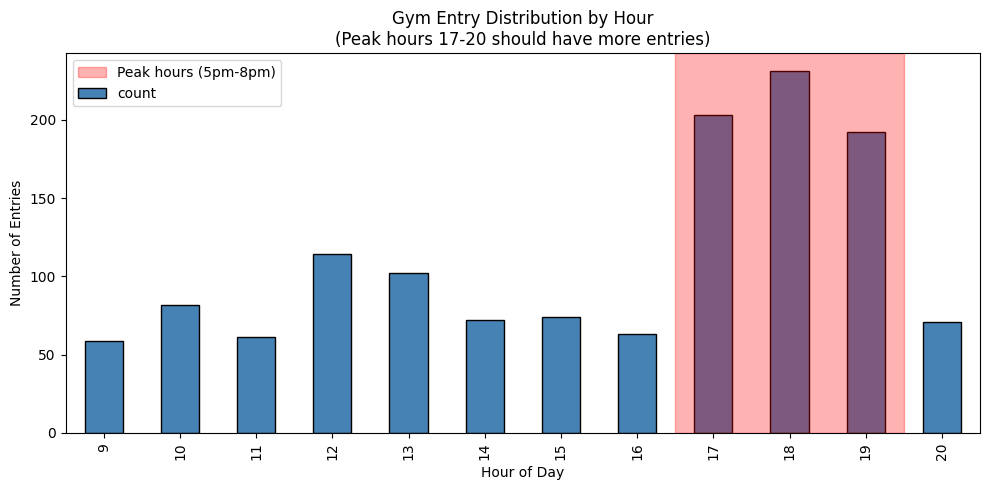

In [6]:
# Check entry hour distribution (peak hours 17-20 should have more entries)
import matplotlib.pyplot as plt

visits_df['ENTRY_HOUR'] = visits_df['ENTRY_TIME'].dt.hour
entry_dist = visits_df['ENTRY_HOUR'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
entry_dist.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Entries')
plt.title('Gym Entry Distribution by Hour\n(Peak hours 17-20 should have more entries)')
plt.axvspan(7.5, 10.5, alpha=0.3, color='red', label='Peak hours (5pm-8pm)')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Check registration date range (should span ~4 years)
print("Registration date range:")
print(f"  Earliest: {users_df['REGISTRATION_DATE'].min()}")
print(f"  Latest: {users_df['REGISTRATION_DATE'].max()}")

# Verify registration date is always before entry time
merged = visits_df.merge(users_df[['USER_ID', 'REGISTRATION_DATE']], on='USER_ID')
registration_before_entry = (merged['REGISTRATION_DATE'] < merged['ENTRY_TIME']).all()
print(f"\nAll registration dates before entry times: {registration_before_entry}")


Registration date range:
  Earliest: 2021-12-24 16:12:00
  Latest: 2025-11-01 15:08:00

All registration dates before entry times: True


In [8]:
# Check session durations (mean ~50 min, most under 100)
visits_df['duration_minutes'] = (visits_df['EXIT_TIME'] - visits_df['ENTRY_TIME']).dt.total_seconds() / 60

print("Session duration statistics (minutes):")
print(visits_df['duration_minutes'].describe())
print(f"\nMin duration: {visits_df['duration_minutes'].min():.0f} minutes")
print(f"Max duration: {visits_df['duration_minutes'].max():.0f} minutes")
print(f"Sessions over 100 min: {(visits_df['duration_minutes'] > 100).sum()} ({(visits_df['duration_minutes'] > 100).mean()*100:.1f}%)")


Session duration statistics (minutes):
count    1324.000000
mean       62.923716
std        26.524013
min         1.000000
25%        46.000000
50%        57.000000
75%        72.000000
max       176.000000
Name: duration_minutes, dtype: float64

Min duration: 1 minutes
Max duration: 176 minutes
Sessions over 100 min: 116 (8.8%)


In [9]:
# Check demographics distribution
print("Age distribution:")
print(users_df['AGE'].describe())

print("\nGender distribution:")
print(users_df['GENDER'].value_counts())


Age distribution:
count    100.000000
mean      46.850000
std       15.990133
min       18.000000
25%       34.750000
50%       48.000000
75%       62.000000
max       70.000000
Name: AGE, dtype: float64

Gender distribution:
GENDER
F    54
M    46
Name: count, dtype: int64


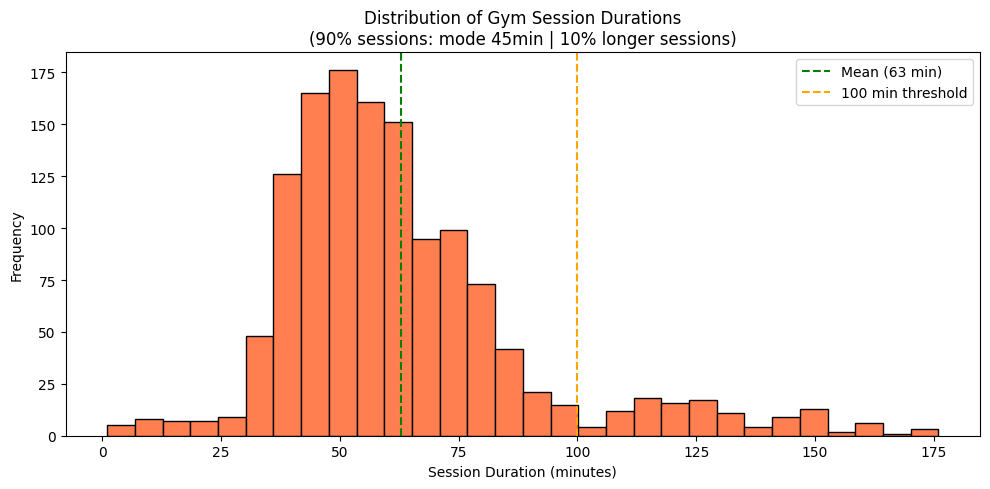

In [10]:
# Visualize session duration distribution
plt.figure(figsize=(10, 5))
plt.hist(visits_df['duration_minutes'], bins=30, color='coral', edgecolor='black')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Gym Session Durations\n(90% sessions: mode 45min | 10% longer sessions)')
plt.axvline(visits_df['duration_minutes'].mean(), color='green', linestyle='--', label=f'Mean ({visits_df["duration_minutes"].mean():.0f} min)')
plt.axvline(100, color='orange', linestyle='--', label='100 min threshold')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Final summary - clean tables
print("=== FINAL USERS TABLE (sample) ===")
users_clean = users_df.drop(columns=['NUM_CLASSES'], errors='ignore')
print(users_clean.sample(5))

print("\n=== FINAL VISITS TABLE (sample) ===")
visits_clean = visits_df.drop(columns=['ENTRY_HOUR', 'duration_minutes'], errors='ignore')
print(visits_clean.sample(5))


=== FINAL USERS TABLE (sample) ===
    USER_ID   REGISTRATION_DATE  AGE GENDER  ZUMBA  BODY_PUMP  PILATES  \
59    19116 2023-07-27 18:09:00   28      M  False      False     True   
79    94939 2022-04-16 12:20:00   54      F  False      False    False   
29    46463 2024-04-06 15:11:00   48      M  False      False    False   
70    93320 2025-04-15 11:50:00   60      F   True      False    False   
9     81482 2022-06-15 20:06:00   37      M  False      False    False   

    SPINNING  
59     False  
79     False  
29     False  
70      True  
9      False  

=== FINAL VISITS TABLE (sample) ===
      USER_ID          ENTRY_TIME           EXIT_TIME
232     80010 2024-02-27 19:44:00 2024-02-27 20:31:00
1109    20328 2025-10-06 18:02:00 2025-10-06 18:57:00
225     13478 2024-02-15 19:56:00 2024-02-15 20:31:00
869     38893 2025-06-26 13:36:00 2025-06-26 14:27:00
36      59797 2023-02-03 17:07:00 2023-02-03 18:27:00
